<a href="https://colab.research.google.com/github/juan04r/Server-Client/blob/main/Entrenamiento_Modelo_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!nvidia-smi

Tue Jul 15 03:46:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
%load_ext cudf.pandas
import pandas as pd

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.7/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="In9u9mZae3bxaFXKgkmx")
project = rf.workspace("deteccin-de-sintomas").project("deteccion-de-sintomas")
version = project.version(7)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Detección-de-síntomas-7'

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/train/weights/best.pt" epochs=50 imgsz=640 project="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7"

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Detección-de-síntomas-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ove

In [ ]:
!yolo task=detect mode=val model="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/train2/weights/best.pt"  data={dataset.location}/data.yaml project="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7"

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1118.0±389.4 MB/s, size: 58.7 KB)
val: Scanning /content/Detección-de-síntomas-7/valid/labels.cache... 439 images, 1 backgrounds, 0 corrupt: 100% 439/439 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 30, len(boxes) = 987. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 28/28 [00:05<00:00,  4.73it/s]
                   all        439        987      0.836      0.706      0.762      0.559
   banana_streak_virus         95        162      0.759      0.679      0.731      0.515
               foc_r4t         90     

In [ ]:
!yolo task=detect mode=predict model="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True project="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7"

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs

image 1/218 /content/Detección-de-síntomas-7/test/images/0_jpeg.rf.a15c5c45ff1969ca1343d01be14c36f9.jpg: 640x640 2 mancha_cordanas, 22.4ms
image 2/218 /content/Detección-de-síntomas-7/test/images/100_jpeg.rf.2186ccd43b43a291d1ab347b46db877f.jpg: 640x640 3 mancha_cordanas, 16.2ms
image 3/218 /content/Detección-de-síntomas-7/test/images/114_jpeg.rf.b8f45d44b701445d5ced60be93f32cff.jpg: 640x640 3 mancha_cordanas, 11.5ms
image 4/218 /content/Detección-de-síntomas-7/test/images/121_jpeg.rf.db4769061bcf6ee2609c43751d5c11a5.jpg: 640x640 1 mancha_cordana, 10.3ms
image 5/218 /content/Detección-de-síntomas-7/test/images/122_jpeg.rf.b6392ae052a028f5360554c31f2d0fc1.jpg: 640x640 1 mancha_cordana, 10.5ms
image 6/218 /content/Detección-de-síntomas-7/test/images/129_jpeg.rf.72baed66d6c1600a7576697b6d57c935.jpg: 640x640 3 mancha_cordanas

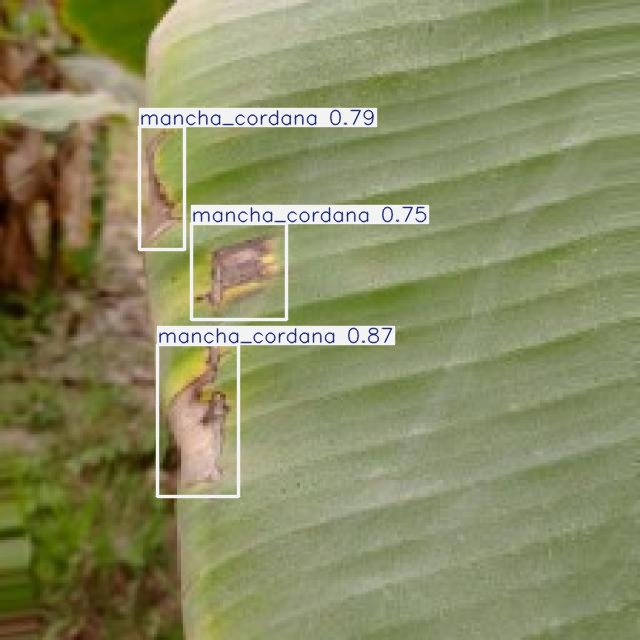

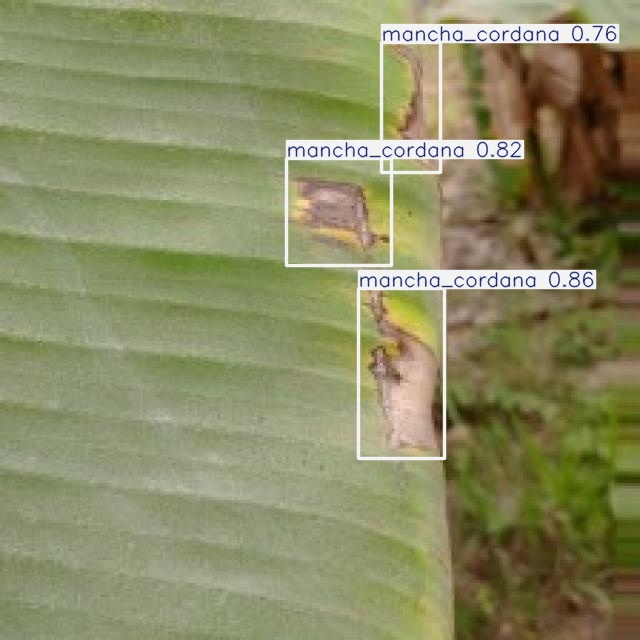

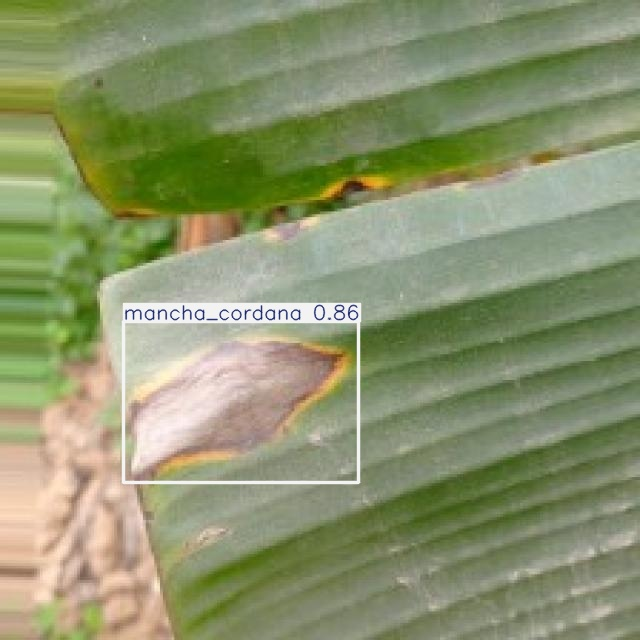

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/predict2'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img, width=600))
  print("\n")

In [ ]:
!yolo task=detect mode=val model="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7/train2/weights/best.pt"  data={dataset.location}/data.yaml split=test project="/content/gdrive/MyDrive/yolov11_resume_runs_datasetv7"

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1124.9±157.7 MB/s, size: 50.5 KB)
val: Scanning /content/Detección-de-síntomas-7/test/labels... 218 images, 0 backgrounds, 0 corrupt: 100% 218/218 [00:00<00:00, 2299.04it/s]
val: New cache created: /content/Detección-de-síntomas-7/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 430. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:04<00:00,  2.96it/s]
                   all        218        430      0.884      0.691      0.749      0.575
   banana_streak_virus         41         63      